In [1]:
# import sys  
# !{sys.executable} -m pip install --user pathos

import sys
!{sys.executable} -m pip install numba

In [2]:
import numpy as np
import random
import time

In [3]:
# --------
# -- Q1 --
# --------
'''
Your task is to simulate the stock market according to Markov Chain. 
    - Start from a random state 
    - simulate many many iterations
If your code is right, the fraction of days in each state should converge.
Implement a pure-python version and a numba version, and compare speeds.
'''
#  first element: bull       second: bear       third: recession
#  prob to go from current status to   [ bull, bear, recession ]
stati_names = ["bull", "bear", "recession"]
transition = {
    'bull': {'bull': 0.9, 'bear': 0.075, 'recession': 0.025},
    'bear': {'bull': 0.15, 'bear': 0.8, 'recession': 0.05},
    'recession': {'bull': 0.25, 'bear': 0.25, 'recession': 0.5}
}

# python version
def stock_market(steps_):
    cur_status = random.choice(stati_names)
    counts = {'bull': 0, 'bear': 0, 'recession': 0}

    for it in range(steps_):
        counts[cur_status] +=1
        sum_prob = 0.0
        rand = random.random()
        for new, prob in transition[cur_status].items():
            sum_prob += prob
            if rand < sum_prob:
                cur_status = new
                break
    return counts

In [4]:
step_vals = [1000, 10000, 100000, 1000000, 10000000]
fractions = {'bull': [], 'bear': [], 'recession': []}

for step in step_vals:
    result = stock_market(step)
    total = sum(result.values())
    fractions['bull'].append(result['bull'] / total)
    fractions['bear'].append(result['bear'] / total)
    fractions['recession'].append(result['recession'] / total)


steps_np = np.array(step_vals)
bull_fractions = np.array(fractions['bull'])
bear_fractions = np.array(fractions['bear'])
recession_fractions = np.array(fractions['recession'])


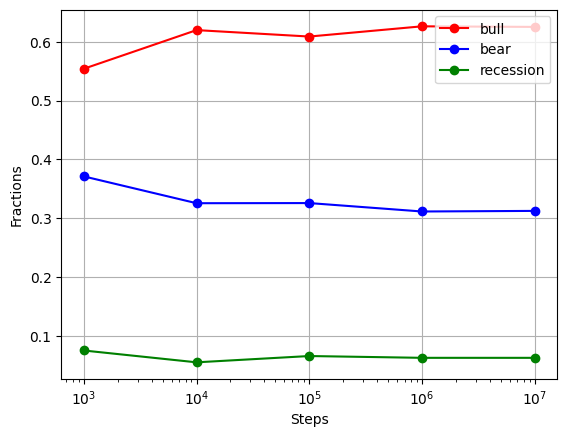

In [5]:
# draw results to see values converging
import matplotlib.pyplot as plt
plt.figure()
plt.plot(steps_np, bull_fractions, label='bull', marker='o',color='red')
plt.plot(steps_np, bear_fractions, label='bear', marker='o', color='blue')
plt.plot(steps_np, recession_fractions, label='recession', marker='o', color='green')
plt.xscale('log')
plt.xlabel('Steps')
plt.ylabel('Fractions')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import numpy as np
from numba import njit

transition_nump = np.array([
    [0.9, 0.075, 0.025], 
    [0.15, 0.8, 0.05],
    [0.25, 0.25, 0.5]
])

# numba version
@njit
def stock_market_numba(steps):
    states = [0, 1, 2]  # indices
    cur_status = np.random.choice(3)
    counts = [0, 0, 0]

    for it in range(steps):
        counts[cur_status] +=1
        rand = random.random()
        sum_prob = 0.0
        for new in range(3):
            sum_prob += transition_nump[cur_status][new]
            if rand<sum_prob:
                cur_status = new
                break
    return counts

fractions_numba = {'bull': [], 'bear': [], 'recession': []}
step_vals = [1000, 10000, 100000, 1000000, 10000000]

for step in step_vals:
    result_numba = stock_market_numba(step)
    total_numba = np.sum(result_numba)
    fractions_numba['bull'].append(result_numba[0] / total_numba)
    fractions_numba['bear'].append(result_numba[1] / total_numba)
    fractions_numba['recession'].append(result_numba[2] / total_numba)

# Results for Numba
steps_np = np.array(step_vals)
bull_fractions_numba = np.array(fractions_numba['bull'])
bear_fractions_numba = np.array(fractions_numba['bear'])
recession_fractions_numba = np.array(fractions_numba['recession'])

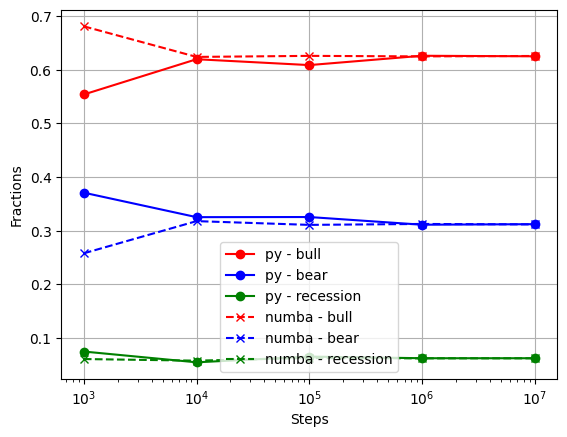

In [7]:
plt.figure()

plt.plot(steps_np, bull_fractions, label='py - bull', marker='o', linestyle='-', color='red')
plt.plot(steps_np, bear_fractions, label='py - bear', marker='o', linestyle='-', color='blue')
plt.plot(steps_np, recession_fractions, label='py - recession', marker='o', linestyle='-', color='green')

plt.plot(steps_np, bull_fractions_numba, label='numba - bull', marker='x', linestyle='--', color='red')
plt.plot(steps_np, bear_fractions_numba, label='numba - bear', marker='x', linestyle='--', color='blue')
plt.plot(steps_np, recession_fractions_numba, label='numba - recession', marker='x', linestyle='--', color='green')

plt.xscale('log')
plt.xlabel('Steps')
plt.ylabel('Fractions')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#speed comparison

#python
speed_py = []
for step in step_vals:
    t0 = time.time()
    stock_market(step)
    t1 = time.time()
    print("pyhton speed: \tstep : ", step,"\t", round(t1-t0,4)," s")
    speed_py.append(t1-t0)

#numba
speed_num = []
for step in step_vals:
    t0 = time.time()
    stock_market_numba(step)
    t1 = time.time()
    print("numba speed: \tstep : ", step,"\t", round(t1-t0,4)," s")
    speed_num.append(t1-t0)

pyhton speed: 	step :  1000 	 0.0003  s
pyhton speed: 	step :  10000 	 0.0037  s
pyhton speed: 	step :  100000 	 0.044  s
pyhton speed: 	step :  1000000 	 0.4043  s
pyhton speed: 	step :  10000000 	 3.8497  s
numba speed: 	step :  1000 	 0.0001  s
numba speed: 	step :  10000 	 0.0001  s
numba speed: 	step :  100000 	 0.0012  s
numba speed: 	step :  1000000 	 0.0133  s
numba speed: 	step :  10000000 	 0.1286  s


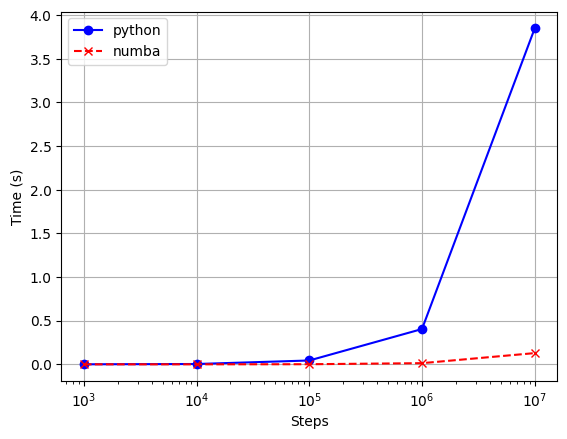

In [9]:
plt.figure()
plt.plot(step_vals, speed_py, label='python', marker='o', linestyle='-', color='blue')
plt.plot(step_vals, speed_num, label='numba', marker='x', linestyle='--', color='red')

# Configurazioni del grafico
plt.xlabel('Steps')
plt.xscale('log')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# --------
# -- Q2 --
# --------
"""
Write a decorator for the plots of all your papers.
Remember a decorator takes a function.
This function in turn should return a matplotlib figure object.
Before the function is called, the decorator should intialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
After the figure it's done, the decorator should save it to pdf.
"""


import matplotlib.pyplot as plt

# define function
def myplot(func):
    def wrapper(*args, **kwargs):
        #settings
        plt.rcParams.update({
            'figure.figsize': (10, 6),
            'axes.titlesize': 'large',
            'axes.labelsize': 'x-large',
            'xtick.labelsize': 'x-large',
            'ytick.labelsize': 'x-large',
            'legend.fontsize': 'large',
            'font.family': 'serif',
            'font.serif': 'Times New Roman',
            'savefig.dpi': 300
        })
        fig = func(*args, **kwargs)
        pdf_filename = 'myplot.pdf'
        fig.savefig(pdf_filename, format='pdf')
        return fig
    return wrapper

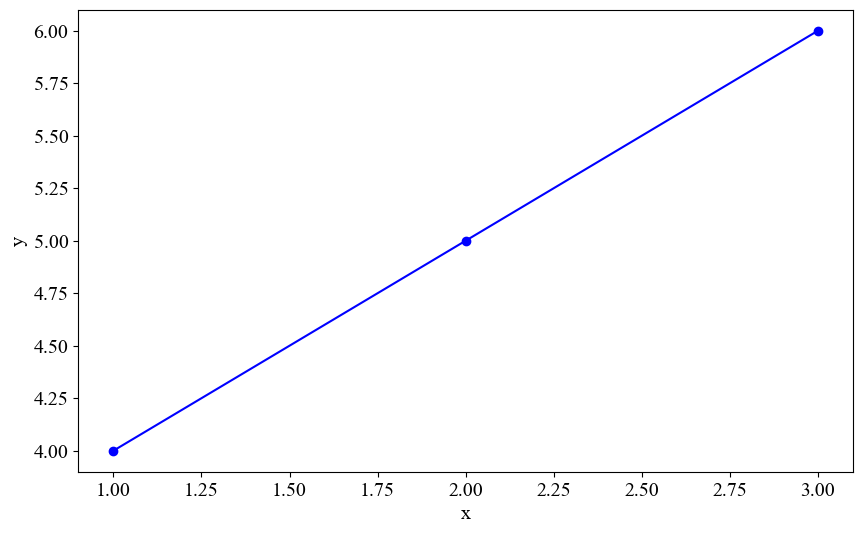

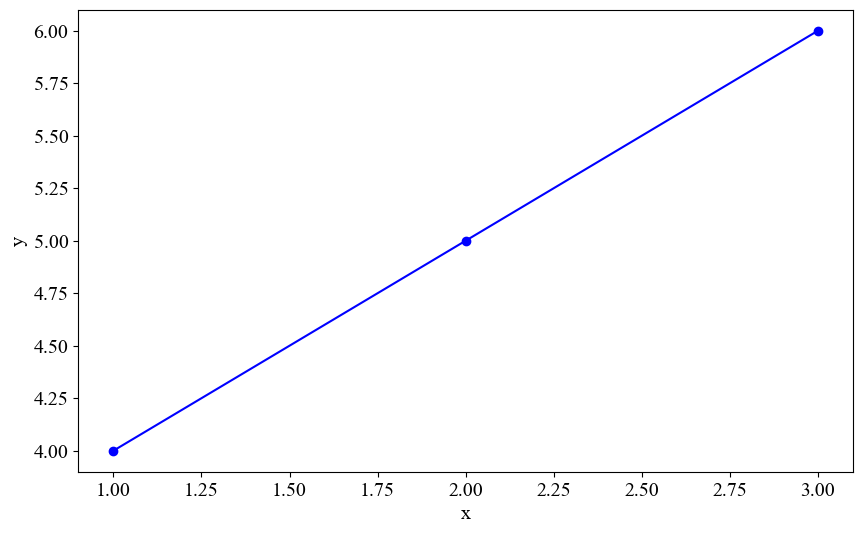

In [11]:
@myplot
def create_plot():
    fig, ax = plt.subplots()
    ax.plot([1, 2, 3], [4, 5, 6], marker='o', linestyle='-', color='blue')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig

create_plot()